In [40]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import itertools

import pandas as pd

import seaborn as sns
sns.set_context("notebook", font_scale=1.5)

from sklearn.datasets import make_classification
from sklearn import metrics
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from imblearn.over_sampling import SMOTE 

In [41]:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def add_identity(axes, *line_args, **line_kwargs):
    identity, = axes.plot([], [], *line_args, **line_kwargs)
    def callback(axes):
        low_x, high_x = axes.get_xlim()
        low_y, high_y = axes.get_ylim()
        low = max(low_x, low_y)
        high = min(high_x, high_y)
        identity.set_data([low, high], [low, high])
    callback(axes)
    axes.callbacks.connect('xlim_changed', callback)
    axes.callbacks.connect('ylim_changed', callback)
    return axes

In [42]:
# Generate the dataset
X, y = make_classification(n_classes=2, class_sep=.5, weights=[0.2, 0.8],
                           n_informative=5, n_redundant=0, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=150, random_state=10)
X_test = X[100:]
y_test = y[100:]
X = X[:100]
y = y[:100]

X = preprocessing.scale(X)

Confusion matrix, without normalization
[[ 1  8]
 [ 3 38]]


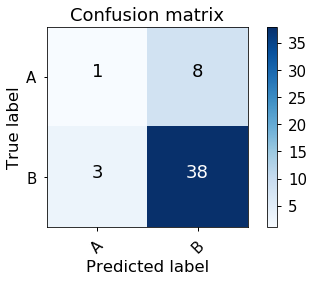

In [43]:
# lr = RandomForestClassifier(n_jobs=2, random_state=0, max_depth=3)
lr = LogisticRegression()
lr.fit(X, y)
y_pred = lr.predict(X_test)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_pred), classes=['A', 'B'])

Confusion matrix, without normalization
[[ 3  6]
 [ 9 32]]


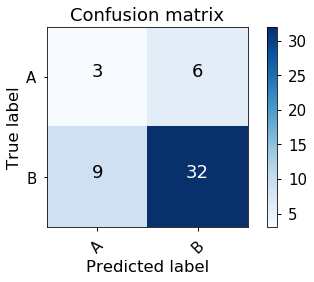

In [44]:
lr_bal = LogisticRegression(class_weight='balanced')
lr_bal.fit(X, y)
y_pred_bal = lr_bal.predict(X_test)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_pred_bal), classes=['A', 'B'])

Confusion matrix, without normalization
[[ 3  6]
 [ 6 35]]


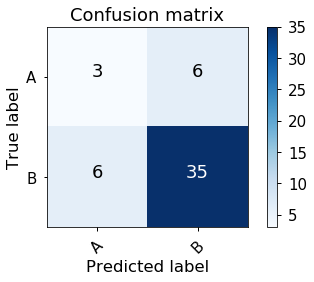

In [45]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_sample(X, y)

# lr_smote = RandomForestClassifier(n_jobs=2, random_state=0, max_depth=3)
lr_smote = LogisticRegression()
lr_smote.fit(X_res, y_res)
y_pred_smote = lr_smote.predict(X_test)
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_pred_smote), classes=['A', 'B'])

In [46]:
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.25      0.11      0.15         9
          1       0.83      0.93      0.87        41

avg / total       0.72      0.78      0.74        50



In [47]:
print(metrics.classification_report(y_test, y_pred_bal))

             precision    recall  f1-score   support

          0       0.25      0.33      0.29         9
          1       0.84      0.78      0.81        41

avg / total       0.74      0.70      0.72        50



Text(0.5,0,'Unbalanced coef')

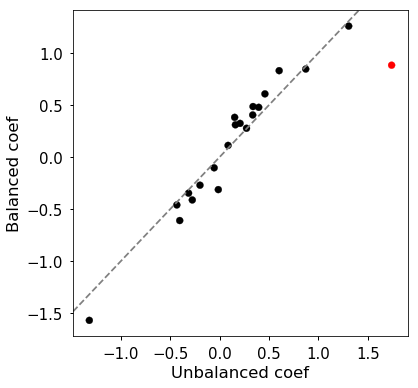

In [48]:
f, ax = plt.subplots(figsize=(6, 6))
ax.scatter(np.append(lr.intercept_, lr.coef_), np.append(lr_bal.intercept_, lr_bal.coef_), 
            c=['r'] + (lr.coef_.shape[1]) * ['k'])
add_identity(ax, color='gray', ls='--')
plt.ylabel('Balanced coef')
plt.xlabel('Unbalanced coef')

Text(0.5,0,'Unbalanced coef')

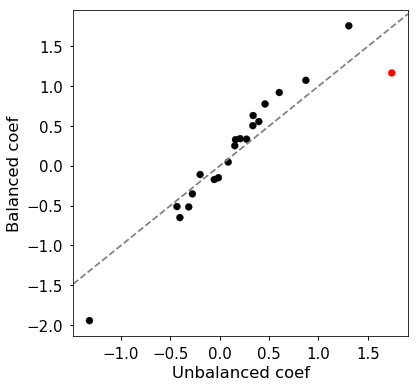

In [49]:
f, ax = plt.subplots(figsize=(6, 6))
ax.scatter(np.append(lr.intercept_, lr.coef_), 
           np.append(lr_smote.intercept_, lr_smote.coef_), 
            c=['r'] + (lr.coef_.shape[1]) * ['k'])
add_identity(ax, color='gray', ls='--')
plt.ylabel('Balanced coef')
plt.xlabel('Unbalanced coef')

Text(0.5,0,'Unbalanced proba')

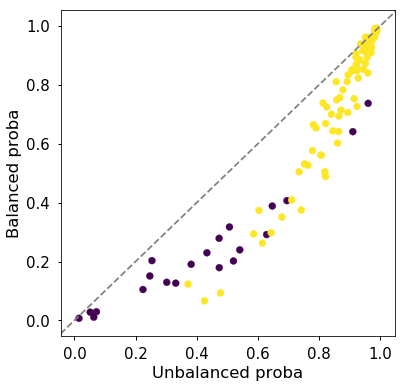

In [50]:
f, ax = plt.subplots(figsize=(6, 6))
ax.scatter(lr.predict_proba(X)[:,1], lr_bal.predict_proba(X)[:,1], c=y)
add_identity(ax, color='gray', ls='--')
# ax.vlines(0.5, ymin=0, ymax=1)
# ax.hlines(0.5, xmin=0, xmax=1)
plt.ylabel('Balanced proba')
plt.xlabel('Unbalanced proba')

Text(0.5,0,'Unbalanced proba')

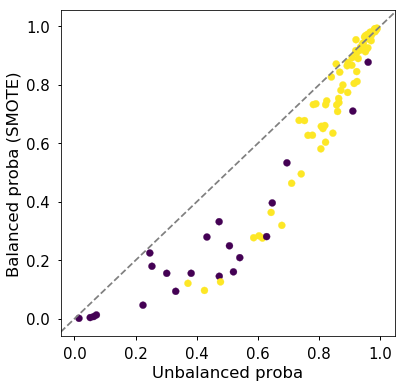

In [57]:
f, ax = plt.subplots(figsize=(6, 6))
ax.scatter(lr.predict_proba(X)[:,1], lr_smote.predict_proba(X)[:,1], c=y)
add_identity(ax, color='gray', ls='--')
# ax.vlines(0.5, ymin=0, ymax=1)
# ax.hlines(0.5, xmin=0, xmax=1)
plt.ylabel('Balanced proba (SMOTE)')
plt.xlabel('Unbalanced proba')

#### Ranks of predictions are still basically the same

In [52]:
pd.DataFrame([lr.predict_proba(X)[:,1], lr_bal.predict_proba(X)[:,1]]).T.corr(method='spearman')

,0,1
0,1.000000,0.970633
1,0.970633,1.000000


In [53]:
pd.DataFrame([lr.predict_proba(X)[:,1], lr_smote.predict_proba(X)[:,1]]).T.corr(method='spearman')

,0,1
0,1.000000,0.978398
1,0.978398,1.000000


Text(0.5,0,'Unbalanced logit')

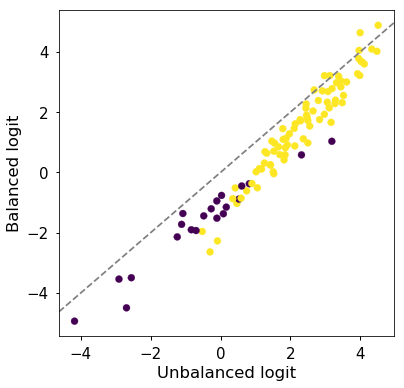

In [54]:
f, ax = plt.subplots(figsize=(6, 6))
ax.scatter(lr.decision_function(X), lr_bal.decision_function(X), c=y)
add_identity(ax, color='gray', ls='--')
plt.ylabel('Balanced logit')
plt.xlabel('Unbalanced logit')

Text(0.5,0,'Unbalanced logit')

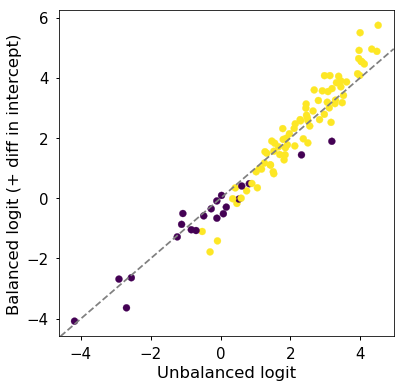

In [55]:
f, ax = plt.subplots(figsize=(6, 6))
ax.scatter(lr.decision_function(X), lr_bal.decision_function(X) + (lr.intercept_ - lr_bal.intercept_)[0], c=y)
add_identity(ax, color='gray', ls='--')
plt.ylabel('Balanced logit (+ diff in intercept)')
plt.xlabel('Unbalanced logit')

Text(0.5,0,'Unbalanced logit')

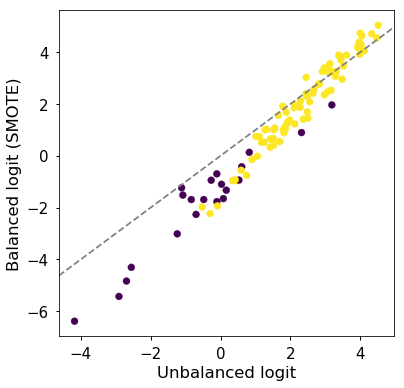

In [58]:
f, ax = plt.subplots(figsize=(6, 6))
ax.scatter(lr.decision_function(X), lr_smote.decision_function(X), c=y)
add_identity(ax, color='gray', ls='--')
plt.ylabel('Balanced logit (SMOTE)')
plt.xlabel('Unbalanced logit')